# Import Data

In [129]:
from tensorflow.keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Filter Only Ones and Zeros

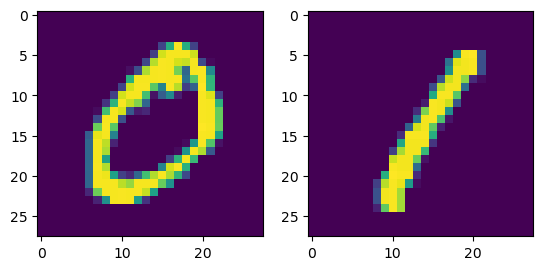

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline  
# Filter the training set
X_train = X_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]

# Filter the test set
X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]
ax,fig = plt.subplots(1,2)
fig[0].imshow(X_train[0])
fig[1].imshow(X_train[1])

In [131]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [132]:
model = Sequential([
    tf.keras.Input(shape=(784,)),    #specify input size
    Dense(25,activation='sigmoid'),
    Dense(15,activation='sigmoid'),
    Dense(1,activation='sigmoid')
])

In [171]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 25)                19625     
                                                                 
 dense_73 (Dense)            (None, 15)                390       
                                                                 
 dense_74 (Dense)            (None, 1)                 16        
                                                                 
Total params: 20,031
Trainable params: 20,031
Non-trainable params: 0
_________________________________________________________________


In [201]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train.reshape([12665,784]),y_train,
    epochs=10
)

Epoch 1/10
396/396 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 2/10
396/396 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 3/10
396/396 [==============================] - 0s 902us/step - loss: 0.0032
Epoch 4/10
396/396 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 5/10
396/396 [==============================] - 0s 844us/step - loss: 0.0036
Epoch 6/10
396/396 [==============================] - 0s 797us/step - loss: 0.0027
Epoch 7/10
396/396 [==============================] - 0s 773us/step - loss: 0.0025
Epoch 8/10
396/396 [==============================] - 0s 830us/step - loss: 0.0025
Epoch 9/10
396/396 [==============================] - 0s 850us/step - loss: 0.0028
Epoch 10/10
396/396 [==============================] - 0s 756us/step - loss: 0.0026


In [169]:
X_train[0].reshape(784,1)

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
      

In [182]:
prediction = model.predict(X_train[5].reshape(1,784))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X_train[1].reshape(1,784))  # a zero
print(f" predicting a one: {prediction}")

1/1 [==============================] - 0s 11ms/step
 predicting a zero: [[0.00068658]]
1/1 [==============================] - 0s 13ms/step
 predicting a one: [[0.9998775]]


# Plot the result

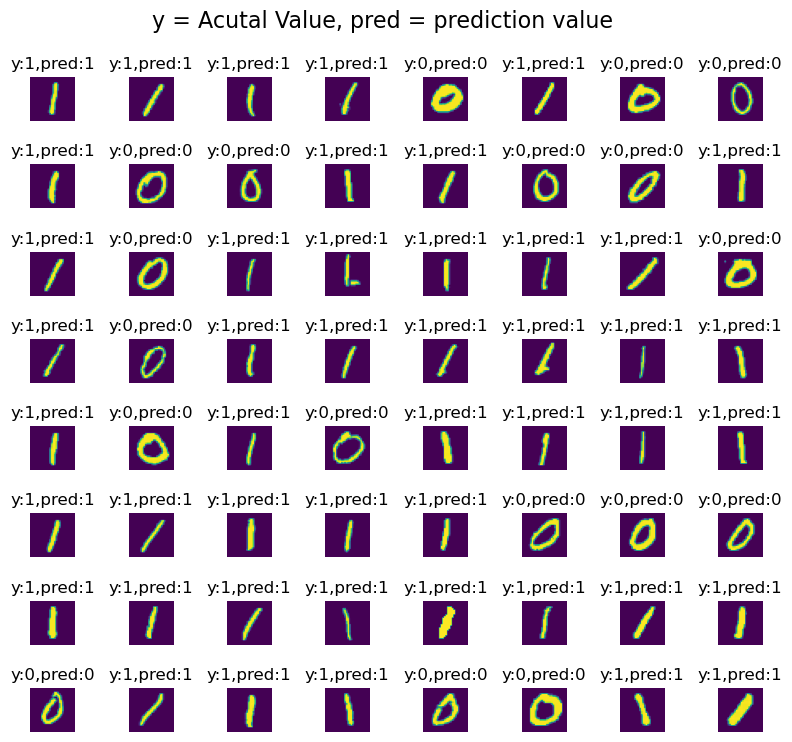

In [202]:
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

m = X_test.shape[0]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped)
    
    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,784),verbose=0)
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"y:{y_test[random_index]},pred:{yhat}")
    ax.set_axis_off()
fig.suptitle("y = Acutal Value, pred = prediction value", fontsize=16)
plt.show()